**Import the Necessary Modules**

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

**Obtain the Dataset**

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target 


**Preview Your Data**

In [11]:
df.head

<bound method NDFrame.head of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0

**Perform Scaling on the Data**

In [12]:
features = diabetes.feature_names

x = df.loc[:, features].values
y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)


**Perform PCA**

In [17]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

**Combine the Target and the Principal Components**

In [18]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

**Perform a Scree Plot of the Principal Components**

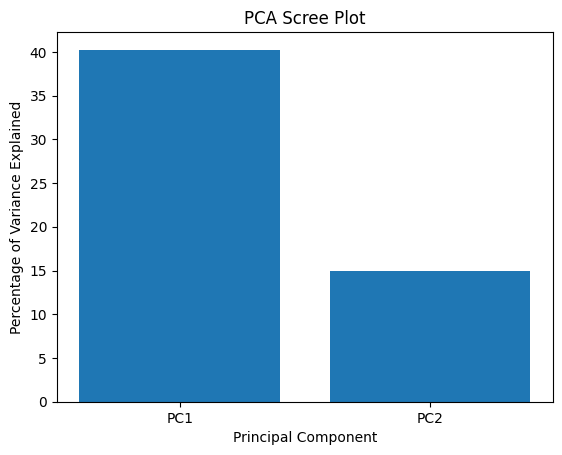

In [24]:

percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
columns = ['PC1', 'PC2']
plt.bar(x= range(1, 3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()


**Plot the Principal Components on 2D**

Text(0, 0.5, 'PC2')

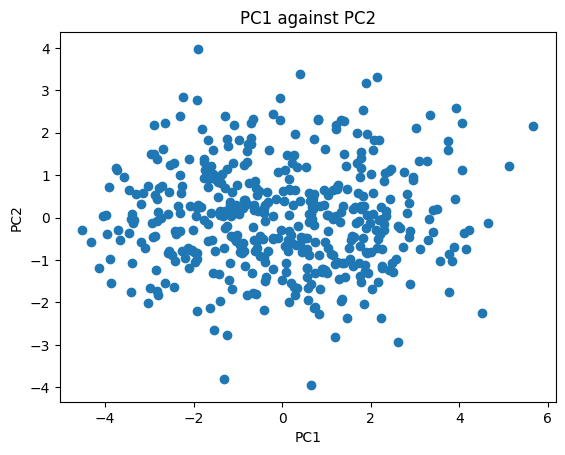

In [20]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

**Plot Of PC1 Vs. PC2**

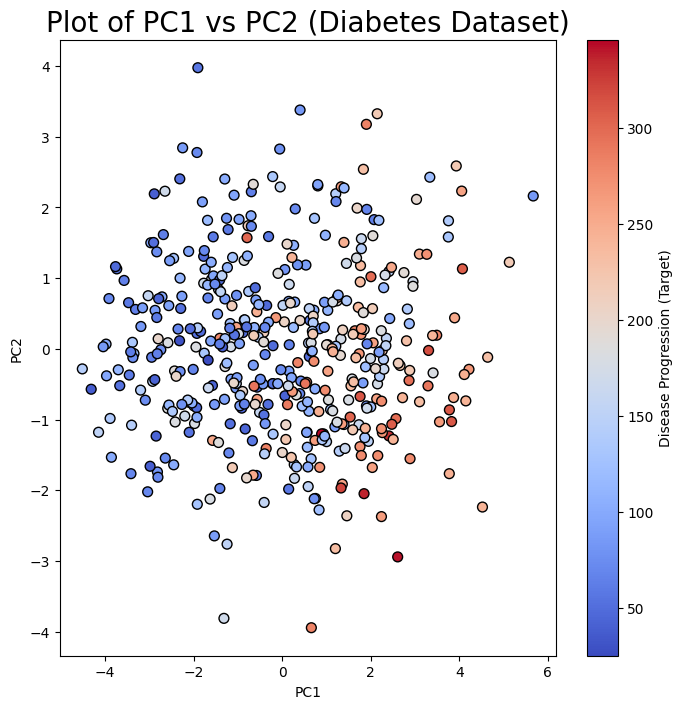

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Plot of PC1 vs PC2 (Diabetes Dataset)', fontsize=20)

scatter = ax.scatter(newDataframe['PC1'], newDataframe['PC2'],
                     c=newDataframe['target'], cmap='coolwarm', s=50, edgecolor='k')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Disease Progression (Target)')

plt.show()

**Explaining the Variance Using Principal Component**

In [26]:
pca.explained_variance_ratio_

array([0.40242108, 0.14923197])